In [9]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm
import urllib
from sqlalchemy import text
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

tqdm.pandas()


In [10]:
conn_string_odbc="Driver={ODBC Driver 18 for SQL Server};Server=tcp:smartspace.database.windows.net,1433;Database=connectionspace;Uid=stats170-G6;Pwd=cro-r5sweDlVay5t=eta;Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"
params = urllib.parse.quote_plus(conn_string_odbc)
conn_str_formatted = 'mssql+pyodbc:///?odbc_connect={}'.format(params)
engine = create_engine(conn_str_formatted)


In [11]:
# # fetch lctr_complete table
# conn = engine.connect()

# df2 = pd.read_sql_query("""SELECT *
#                         FROM [dbo].[lctr_complete];""",
#                         con=conn.engine)
# conn.close()

# df2


In [12]:
# fetch lctr_complete table
conn = engine.connect()

query = text("SELECT * FROM lctr_complete")
results = conn.execute(query)

rows = results.fetchall()
cols = results.keys()
df_processed_data = pd.DataFrame(rows, columns=cols)

conn.close()

df_processed_data


,observation_id,macAddress,sensor,connection_time,predicted_region_id,predicted_region_name
0,699761,cf170b6d02af1925d1c0710ca09b10fbe86df3f8,3144-clwa-4099,2017-09-25 15:38:48,302,3144-clwa-4099
1,699762,c0b682bd56797b25ed58c0641842ad04fc100d99,3144-clwa-4231,2017-09-25 15:39:05,295,3144-clwa-4231
2,699763,8a82ee081af3c5af0544440152f949c4525cd0f8,3143-clwa-3231,2017-09-25 15:39:05,222,3143-clwa-3231
3,699764,99b4615fbd8412eb25e4dc19e98c0497547a5a60,3145-clwa-5019,2017-09-25 15:39:10,374,3145-clwa-5019
4,699765,f4a6517603e69e48c8944758f0cd35ac6b7c58cb,3142-clwa-2209,2017-09-25 15:39:10,146,3142-clwa-2209
...,...,...,...,...,...,...
18957331,167940391,9baf47a575bbc04e3fa0f668137f431814a27ebc,3142-clwa-2019,2019-05-20 12:00:51,147,3142-clwa-2019
18957332,167940392,b566e5cc745ea77bf09d4e374f1ca8c00a20439e,3143-clwa-3099,2019-05-20 12:00:51,225,3143-clwa-3099
18957333,167940393,6ff5548ee1ade03401c070ea103709802f6297cd,3143-clwa-3065,2019-05-20 12:00:51,226,3143-clwa-3065
18957334,167940394,76d529e19ba13b5648f1685814dafe8cf55510e6,3143-clwa-3059,2019-05-20 12:00:51,227,3143-clwa-3059


In [13]:
# Extract the last 4 characters from 'sensor' column and create a new column 'room'
df_processed_data['room'] = df_processed_data['predicted_region_name'].str[-4:]

# Get unique room values and sort them
unique_rooms = df_processed_data['room'].unique()
unique_rooms_sorted = sorted(unique_rooms)

# Create a DataFrame with sorted unique room values
sorted_rooms_df = pd.DataFrame(unique_rooms_sorted, columns=['Room'])

# Print the sorted unique room values
sorted_rooms_df

# Get unique predicted_region_name values and sort them
unique_predicted_region_names = df_processed_data['predicted_region_name'].unique()
unique_predicted_region_names_sorted = sorted(unique_predicted_region_names)

# Create a DataFrame with sorted unique predicted_region_name values
sorted_predicted_region_names_df = pd.DataFrame(unique_predicted_region_names_sorted, columns=['Predicted Region Name'])

# Print the sorted unique predicted_region_name values
sorted_predicted_region_names_df

# Set max_rows to None to display all rows
pd.set_option("display.max_rows", None)
print(sorted_predicted_region_names_df)


   Predicted Region Name
0         3141-clwa-1100
1         3141-clwa-1200
2         3141-clwa-1300
3         3141-clwa-1412
4         3141-clwa-1420
5         3141-clwa-1422
6         3141-clwa-1423
7         3141-clwa-1425
8         3141-clwa-1427
9         3141-clwa-1429
10        3141-clwa-1431
11        3141-clwa-1433
12        3141-clwa-1500
13        3141-clwa-1600
14        3141-clwb-1100
15        3141-clwb-1200
16        3141-clwb-1300
17        3141-clwc-1100
18        3141-clwd-1100
19        3141-clwe-1100
20        3142-clwa-2019
21        3142-clwa-2039
22        3142-clwa-2051
23        3142-clwa-2059
24        3142-clwa-2065
25        3142-clwa-2099
26        3142-clwa-2209
27        3142-clwa-2219
28        3142-clwa-2231
29        3143-clwa-3019
30        3143-clwa-3039
31        3143-clwa-3051
32        3143-clwa-3059
33        3143-clwa-3065
34        3143-clwa-3099
35        3143-clwa-3209
36        3143-clwa-3219
37        3143-clwa-3231
38        3144-clwa-4019


In [14]:

from datetime import datetime
calendar17_18_19 = {
    "summer17": [datetime(2017, 6, 26), datetime(2017, 9, 13), datetime(2017, 9, 25)],
    "f17": [datetime(2017, 9, 25), datetime(2017, 12, 15), datetime(2018, 1,  3)],
    "w18": [datetime(2018, 1,  3), datetime(2018,  3, 23), datetime(2018, 3, 28)],
    "s18": [datetime(2018, 3, 28), datetime(2018,  6, 15), datetime(2018, 9, 24)],
    "summer18": [datetime(2018, 6, 25), datetime(2018, 9, 12), datetime(2018, 9, 24)],
    "f18": [datetime(2018, 9, 24), datetime(2018, 12, 14), datetime(2019, 1,  2)],
    "w19": [datetime(2019, 1,  2), datetime(2019,  3, 22), datetime(2019, 3, 27)],
    "s19": [datetime(2019, 3, 27), datetime(2019,  6, 14), datetime(2019, 6, 24)]
    }

for quarter, date_range in calendar17_18_19.items():
    df_processed_data.loc[df_processed_data["connection_time"].between(date_range[0], date_range[1], inclusive="both"   ), "quarter"] = quarter
    df_processed_data.loc[df_processed_data["connection_time"].between(date_range[1], date_range[2], inclusive="neither"), "quarter"] = quarter + "_break"

# Not needed anymore
# Check time range to determine quarter and week ranges based on UCI quarterly academic calendar
earliest_start_time = df_processed_data['connection_time'].min()
latest_end_time = df_processed_data['connection_time'].max()

print("Earliest Start Time:", earliest_start_time)
print("Latest End Time:", latest_end_time)


Earliest Start Time: 2017-09-25 15:38:48
Latest End Time: 2019-05-20 12:00:53


In [15]:
# Create a new column for the week number of the year
df_processed_data['week'] = df_processed_data['connection_time'].dt.isocalendar().week

# Each quarter should start at week 0. Find the earliest time, set as week 0, and set following weeks based on that
# Group by startQuarter, find min week for each quarter
quarter_min_weeks = df_processed_data.groupby('quarter')['week'].min()

# Adjust the 'week' column so that the minimum week value in each quarter starts at 0
for quarter, min_week in quarter_min_weeks.items():
    if pd.notnull(min_week):
        df_processed_data.loc[df_processed_data['quarter'] == quarter, 'week'] -= min_week


In [16]:
# Create a new column for the week number of the year
df_processed_data['week_of_quarter'] = df_processed_data['connection_time'].dt.isocalendar().week

# Each quarter should start at week 0. Find the earliest time, set as week 0, and set following weeks based on that
# Group by startQuarter, find min week for each quarter
quarter_min_weeks = df_processed_data.groupby('quarter')['week_of_quarter'].min()

# Adjust the 'week' column so that the minimum week value in each quarter starts at 0
for quarter, min_week in quarter_min_weeks.items():
    if pd.notnull(min_week):
        df_processed_data.loc[df_processed_data['quarter'] == quarter, 'week_of_quarter'] -= min_week




In [17]:
# # # Create a new column for the week number of the year
# # df_processed_data['week'] = df_processed_data['connection_time'].dt.isocalendar().week


# # Each quarter should start at week 0. find earliest time, set as week 0, set following weeks based on that
# # Group by startQuarter, find min timestamp for each quarter
# quarter_min_timestamps = df_processed_data.groupby('quarter')['connection_time'].min()

# # Assign week per quarter based on min timestamp
# def assign_week_of_quarter(row):
#     quarter_start = quarter_min_timestamps[row['quarter']]
#     return (row['connection_time'] - quarter_start).days // 7 + 1

# # Create new column week_of_quarter
# df_processed_data['week_of_quarter'] = df_processed_data.apply(assign_week_of_quarter, axis=1)

# # Print
# df_processed_dat

In [18]:
# Print the minimum and maximum week values in the 'week' column for each quarter
for quarter, date_range in calendar17_18_19.items():
    quarter_start, quarter_end, _ = date_range
    
    # Filter DataFrame rows for the current quarter
    quarter_data = df_processed_data[df_processed_data['connection_time'].between(quarter_start, quarter_end)]
    
    # Get the minimum and maximum week values in the 'week' column
    min_week = quarter_data['week'].min()
    max_week = quarter_data['week'].max()
    
    print(f"Quarter: {quarter}")
    print(f"Minimum Week: {min_week}")
    print(f"Maximum Week: {max_week}")
    print()


Quarter: summer17
Minimum Week: <NA>
Maximum Week: <NA>

Quarter: f17
Minimum Week: 0
Maximum Week: 11

Quarter: w18
Minimum Week: 0
Maximum Week: 11

Quarter: s18
Minimum Week: 0
Maximum Week: 11

Quarter: summer18
Minimum Week: <NA>
Maximum Week: <NA>

Quarter: f18
Minimum Week: 0
Maximum Week: 11

Quarter: w19
Minimum Week: 0
Maximum Week: 11

Quarter: s19
Minimum Week: 0
Maximum Week: 8



In [19]:
# Extract the first digit of 'room' and assign it to 'floor' column
df_processed_data['floor'] = df_processed_data['room'].astype(str).str[0].astype(int)

# Display the first few rows to verify the new column
print(df_processed_data.head())


   observation_id                                macAddress          sensor  \
0          699761  cf170b6d02af1925d1c0710ca09b10fbe86df3f8  3144-clwa-4099   
1          699762  c0b682bd56797b25ed58c0641842ad04fc100d99  3144-clwa-4231   
2          699763  8a82ee081af3c5af0544440152f949c4525cd0f8  3143-clwa-3231   
3          699764  99b4615fbd8412eb25e4dc19e98c0497547a5a60  3145-clwa-5019   
4          699765  f4a6517603e69e48c8944758f0cd35ac6b7c58cb  3142-clwa-2209   

      connection_time  predicted_region_id predicted_region_name  room  \
0 2017-09-25 15:38:48                  302        3144-clwa-4099  4099   
1 2017-09-25 15:39:05                  295        3144-clwa-4231  4231   
2 2017-09-25 15:39:05                  222        3143-clwa-3231  3231   
3 2017-09-25 15:39:10                  374        3145-clwa-5019  5019   
4 2017-09-25 15:39:10                  146        3142-clwa-2209  2209   

  quarter  week  week_of_quarter  floor  
0     f17     0                0      

In [32]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('quarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def calculate_errors(actual, forecast):
    """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    # rmse = np.sqrt(mse)
    
    mean_actual = actual.mean()
    mae_percentage = (mae / mean_actual) * 100
    # rmse_percentage = (rmse / mean_actual) * 100
    print(f'Mean Absolute Error (MAE): {mae}')
    # print(f'Mean Squared Error (MSE): {mse}')
    # print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    # print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    return mae_percentage
    

In [33]:
def predict_quarter_processed_4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[(validation_data['week_of_quarter'] > 2) & (validation_data['week_of_quarter'] <= 11)]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
    print(mae_percentage)
    return mae_percentage


In [34]:
import warnings

# # Define a context manager to suppress warnings
# with warnings.catch_warnings():
#     # Suppress all warnings
#     warnings.filterwarnings("ignore")
    
quarters_no_break = ['w18', 's18', 'f18', 'w19']
all_quarters = ['f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']

mae_percentages = []
for floor in [2, 3, 4, 5, 6]:
    for quarter in quarters_no_break:
        training_quarters = all_quarters.copy()
        training_quarters.remove(quarter) 
        mae_percentage = predict_quarter_processed_4(df_processed_data, quarter, training_quarters, floor)
        mae_percentages.append({'Quarter': quarter, 'Floor': floor, 'MAE Percentage': mae_percentage})

# Convert the list of dictionaries to a DataFrame
mae_df = pd.DataFrame(mae_percentages)

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 2
Mean Absolute Error (MAE): 0.26565480062784524
Mean Absolute Error (MAE) as percentage of mean: 32.40%
32.40301969334665


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 2
Mean Absolute Error (MAE): 0.19150505397455844
Mean Absolute Error (MAE) as percentage of mean: 21.82%
21.820827389104878


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 2
Mean Absolute Error (MAE): 0.16784275668979876
Mean Absolute Error (MAE) as percentage of mean: 25.09%
25.088229918518955


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 2
Mean Absolute Error (MAE): 0.14898983446284006
Mean Absolute Error (MAE) as percentage of mean: 18.09%
18.088618916242673


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 3
Mean Absolute Error (MAE): 0.19552303640298654
Mean Absolute Error (MAE) as percentage of mean: 24.72%
24.721753367980213


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 3
Mean Absolute Error (MAE): 0.17247707902598705
Mean Absolute Error (MAE) as percentage of mean: 22.27%
22.272103471337708


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 3
Mean Absolute Error (MAE): 0.15151125926137718
Mean Absolute Error (MAE) as percentage of mean: 22.81%
22.81324338484867


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 3
Mean Absolute Error (MAE): 0.19450103587530093
Mean Absolute Error (MAE) as percentage of mean: 25.55%
25.547353254632828


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 4
Mean Absolute Error (MAE): 0.23960499791127166
Mean Absolute Error (MAE) as percentage of mean: 44.24%
44.23597882313527


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 4
Mean Absolute Error (MAE): 0.28165359058949746
Mean Absolute Error (MAE) as percentage of mean: 33.28%
33.284037660511096


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 4
Mean Absolute Error (MAE): 0.24388821841605202
Mean Absolute Error (MAE) as percentage of mean: 42.71%
42.71163045629624


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 4
Mean Absolute Error (MAE): 0.19999358774397652
Mean Absolute Error (MAE) as percentage of mean: 30.79%
30.791019077946675


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 5
Mean Absolute Error (MAE): 0.19259750521403804
Mean Absolute Error (MAE) as percentage of mean: 24.54%
24.53611696903424


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 5
Mean Absolute Error (MAE): 0.24365431982393457
Mean Absolute Error (MAE) as percentage of mean: 29.71%
29.70775351849553


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 5
Mean Absolute Error (MAE): 0.2036605656033057
Mean Absolute Error (MAE) as percentage of mean: 29.66%
29.664633773659787


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 5
Mean Absolute Error (MAE): 0.14024901806128454
Mean Absolute Error (MAE) as percentage of mean: 19.20%
19.20127837894412


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 6
Mean Absolute Error (MAE): 0.24434475330581673
Mean Absolute Error (MAE) as percentage of mean: 31.37%
31.367737618654594


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 6
Mean Absolute Error (MAE): 0.1937115006612834
Mean Absolute Error (MAE) as percentage of mean: 24.91%
24.905518942002


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 6
Mean Absolute Error (MAE): 0.14106244524861566
Mean Absolute Error (MAE) as percentage of mean: 23.49%
23.487144587264766


c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 6
Mean Absolute Error (MAE): 0.189332783759873
Mean Absolute Error (MAE) as percentage of mean: 26.74%
26.737912748500882


In [35]:
# Print the DataFrame
mae_df

# Calculate the average MAE percentage
mae_avg = mae_df['MAE Percentage'].mean()
# Print the average MAE percentage
print(f'Average Absolute Error (MAE) percentage: {mae_avg:.2f}%')

mean_accuracy = 100 - mae_avg

print(f"Mean Accuracy: {mean_accuracy:.2f}%\n")


# Find the row with the lowest MAE percentage
lowest_mae_row = mae_df.loc[mae_df['MAE Percentage'] == mae_df['MAE Percentage'].min()]

# Find the row with the highest MAE percentage
highest_mae_row = mae_df.loc[mae_df['MAE Percentage'] == mae_df['MAE Percentage'].max()]

# Print the rows in a good format with left alignment
print("Lowest MAE Percentage:")
print(lowest_mae_row.to_string(index=False, justify='left'))

print("\nHighest MAE Percentage:")
print(highest_mae_row.to_string(index=False, justify='left'))


Average Absolute Error (MAE) percentage: 27.67%
Mean Accuracy: 72.33%

Lowest MAE Percentage:
Quarter  Floor  MAE Percentage
w19     2      18.088619      

Highest MAE Percentage:
Quarter  Floor  MAE Percentage
w18     4      44.235979      


In [36]:
def predict_quarter_processed_4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[(validation_data['week_of_quarter'] > 2) & (validation_data['week_of_quarter'] <= 11)]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
    print(mae_percentage)

        # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')

    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Normalized Count of Accesses')
    plt.legend()
    plt.ylim(0.0, 1.1)  # Set y-axis limits
    plt.grid(True)
    plt.show()

    return mae_percentage



c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 2
Mean Absolute Error (MAE): 0.26565480062784524
Mean Absolute Error (MAE) as percentage of mean: 32.40%
32.40301969334665


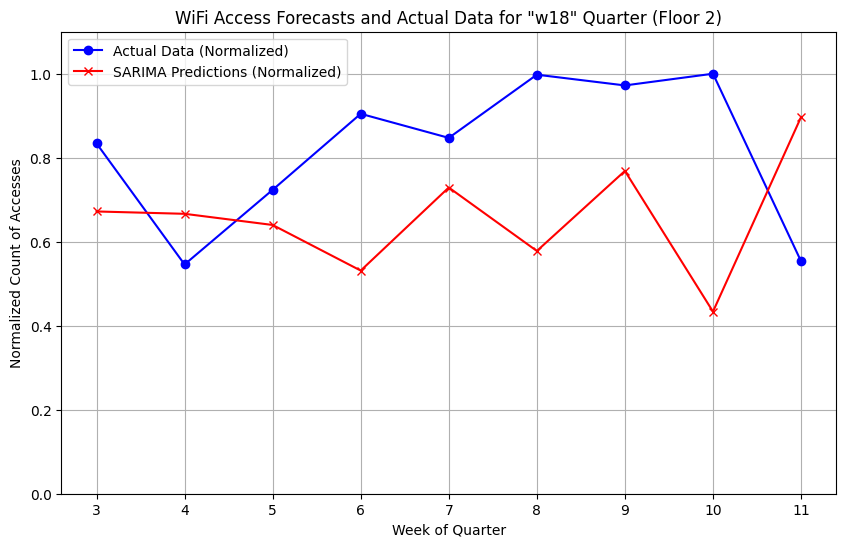

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 2
Mean Absolute Error (MAE): 0.19150505397455844
Mean Absolute Error (MAE) as percentage of mean: 21.82%
21.820827389104878


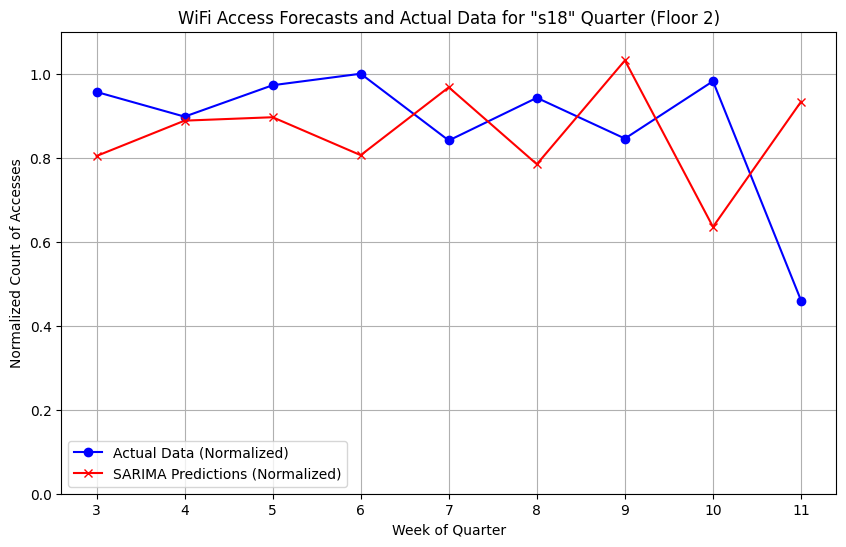

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 2
Mean Absolute Error (MAE): 0.16784275668979876
Mean Absolute Error (MAE) as percentage of mean: 25.09%
25.088229918518955


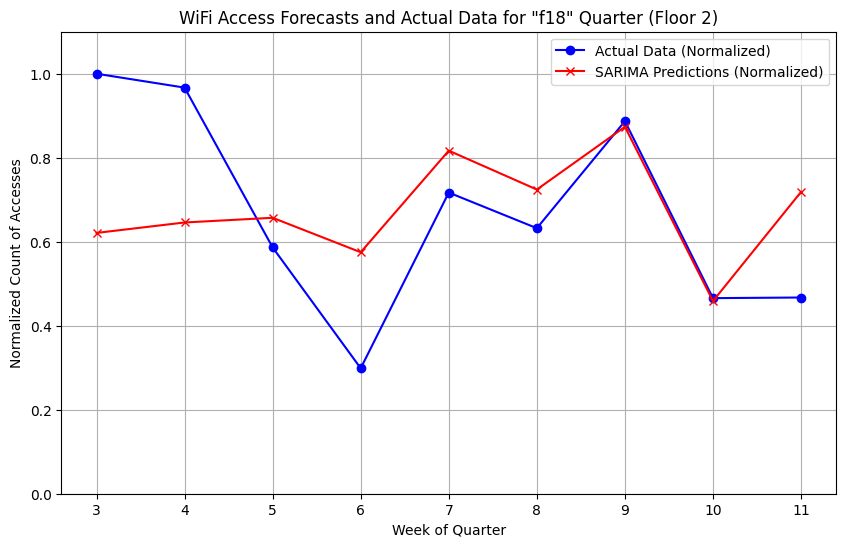

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 2
Mean Absolute Error (MAE): 0.14898983446284006
Mean Absolute Error (MAE) as percentage of mean: 18.09%
18.088618916242673


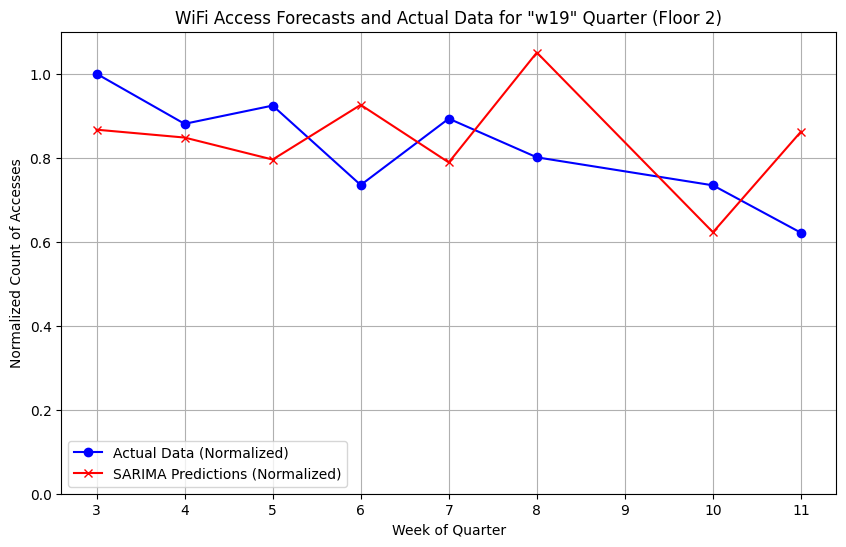

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 3
Mean Absolute Error (MAE): 0.19552303640298654
Mean Absolute Error (MAE) as percentage of mean: 24.72%
24.721753367980213


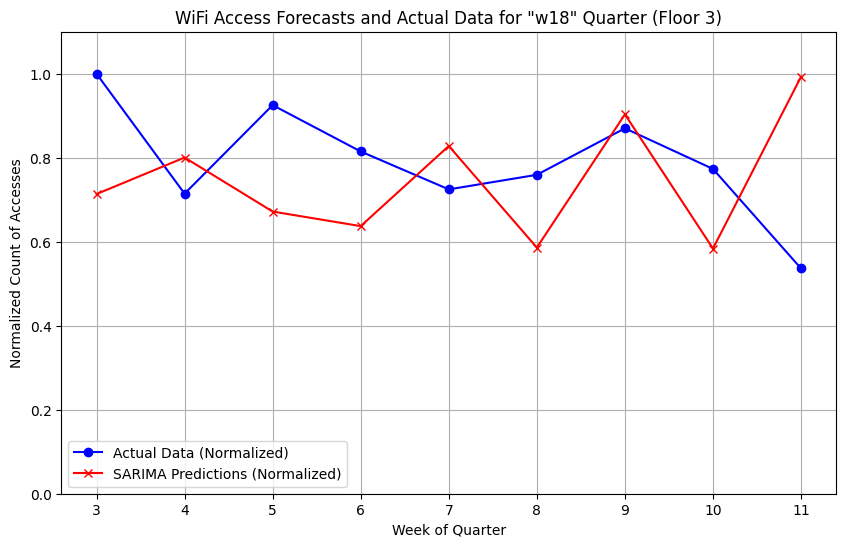

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 3
Mean Absolute Error (MAE): 0.17247707902598705
Mean Absolute Error (MAE) as percentage of mean: 22.27%
22.272103471337708


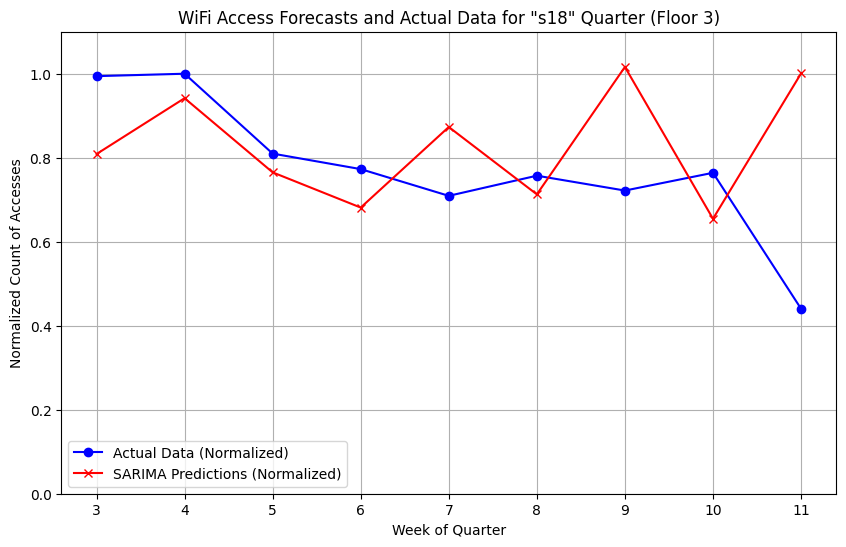

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 3
Mean Absolute Error (MAE): 0.15151125926137718
Mean Absolute Error (MAE) as percentage of mean: 22.81%
22.81324338484867


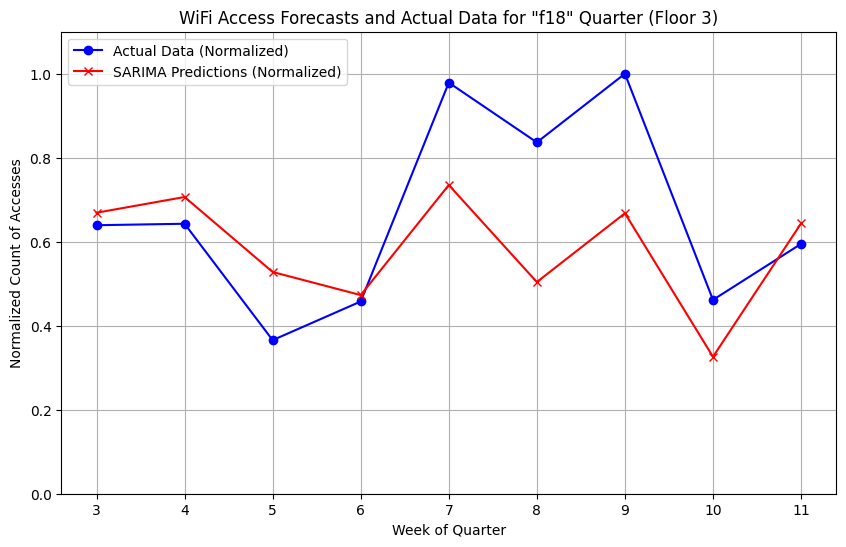

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 3
Mean Absolute Error (MAE): 0.19450103587530093
Mean Absolute Error (MAE) as percentage of mean: 25.55%
25.547353254632828


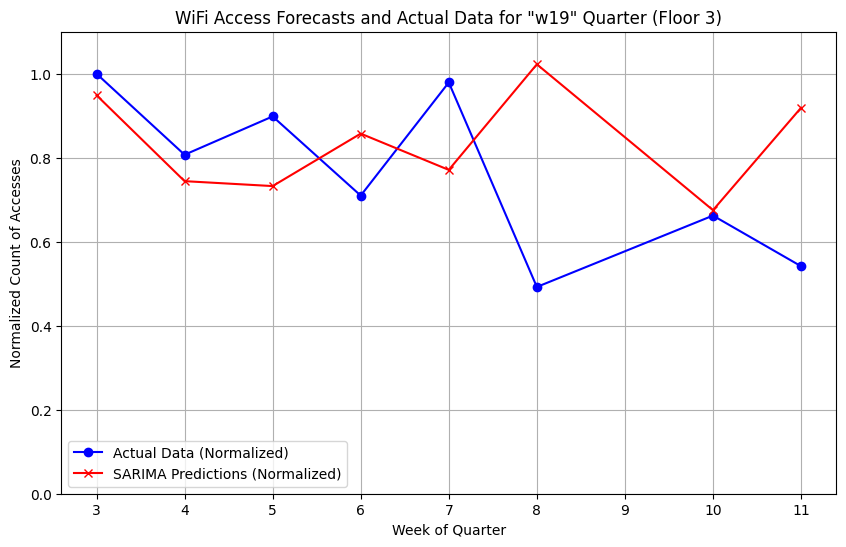

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 4
Mean Absolute Error (MAE): 0.23960499791127166
Mean Absolute Error (MAE) as percentage of mean: 44.24%
44.23597882313527


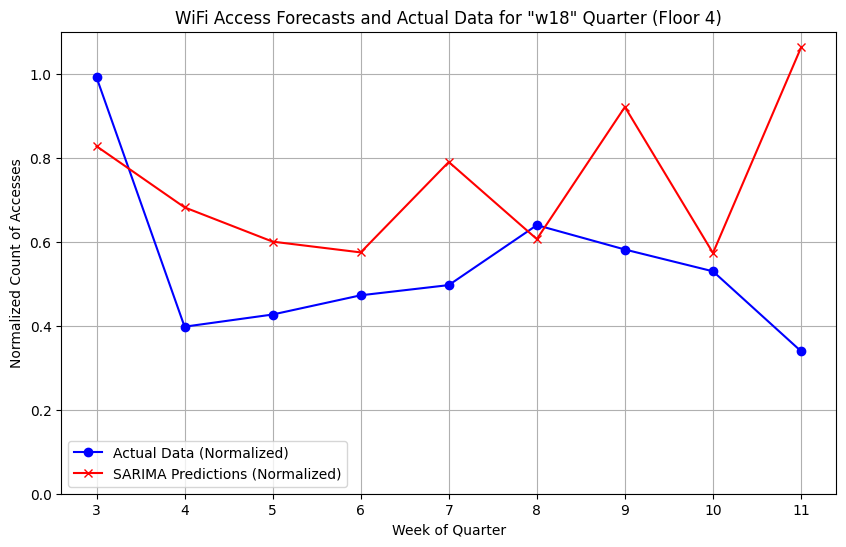

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 4
Mean Absolute Error (MAE): 0.28165359058949746
Mean Absolute Error (MAE) as percentage of mean: 33.28%
33.284037660511096


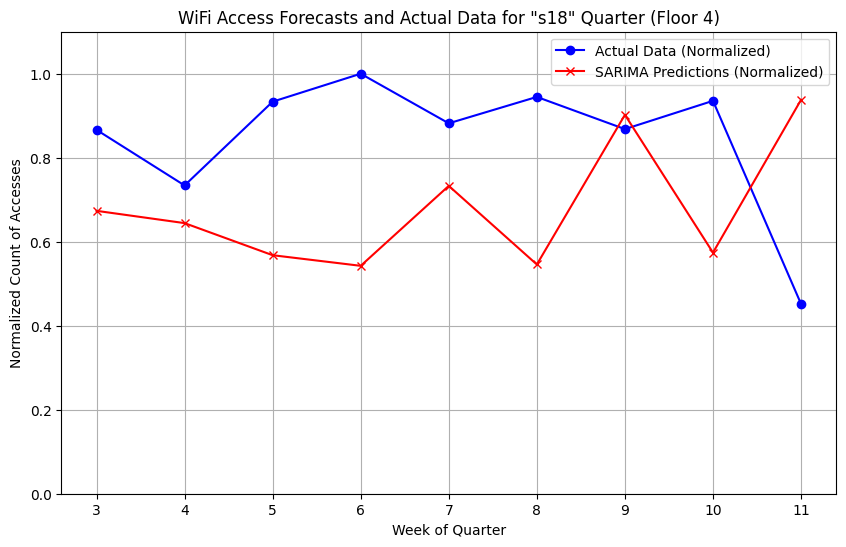

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 4
Mean Absolute Error (MAE): 0.24388821841605202
Mean Absolute Error (MAE) as percentage of mean: 42.71%
42.71163045629624


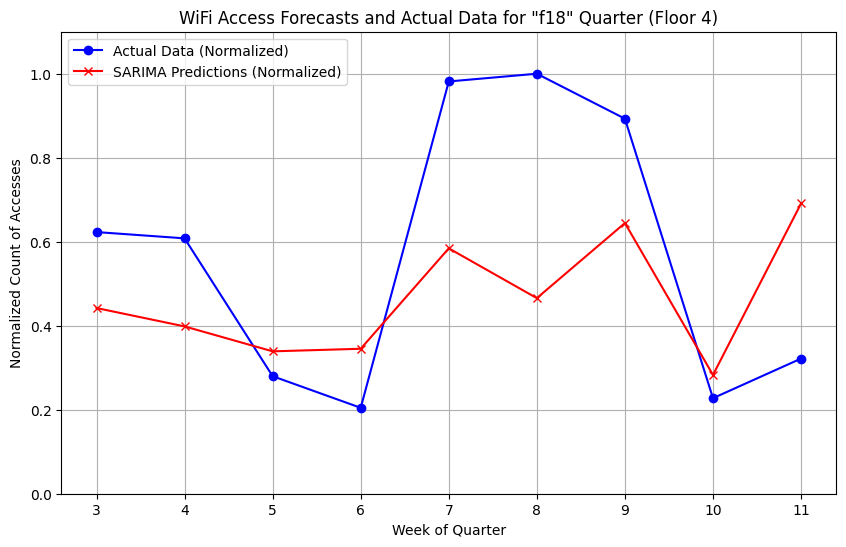

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 4
Mean Absolute Error (MAE): 0.19999358774397652
Mean Absolute Error (MAE) as percentage of mean: 30.79%
30.791019077946675


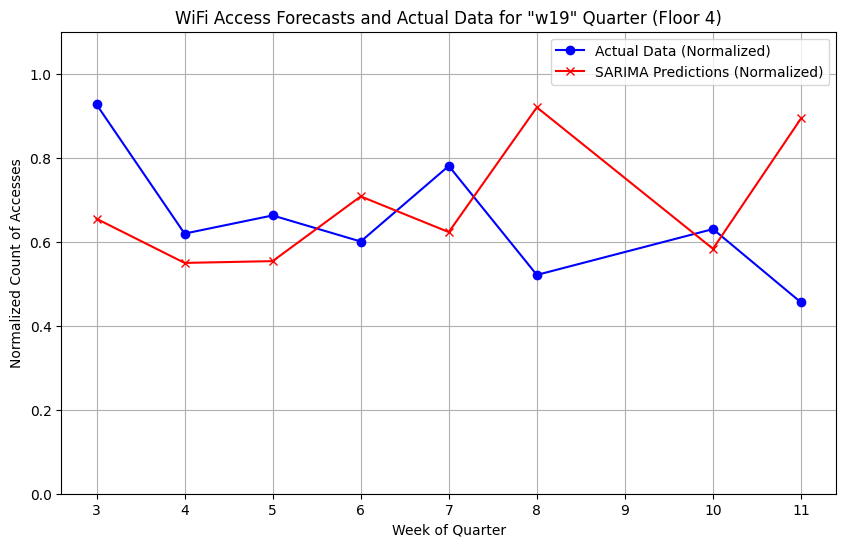

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 5
Mean Absolute Error (MAE): 0.19259750521403804
Mean Absolute Error (MAE) as percentage of mean: 24.54%
24.53611696903424


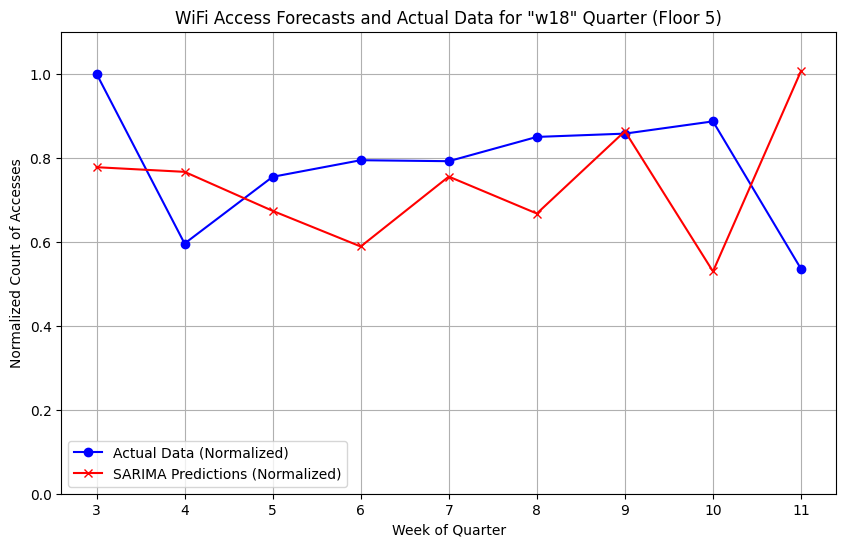

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 5
Mean Absolute Error (MAE): 0.24365431982393457
Mean Absolute Error (MAE) as percentage of mean: 29.71%
29.70775351849553


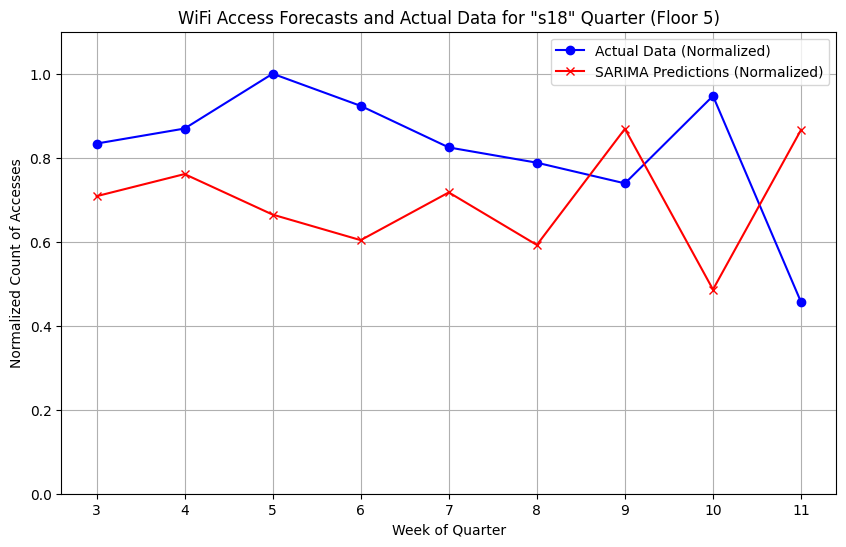

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 5
Mean Absolute Error (MAE): 0.2036605656033057
Mean Absolute Error (MAE) as percentage of mean: 29.66%
29.664633773659787


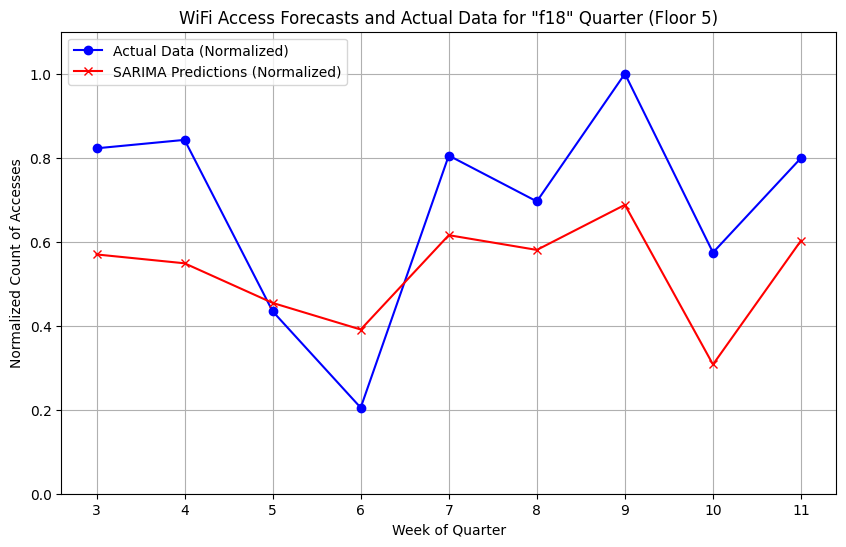

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 5
Mean Absolute Error (MAE): 0.14024901806128454
Mean Absolute Error (MAE) as percentage of mean: 19.20%
19.20127837894412


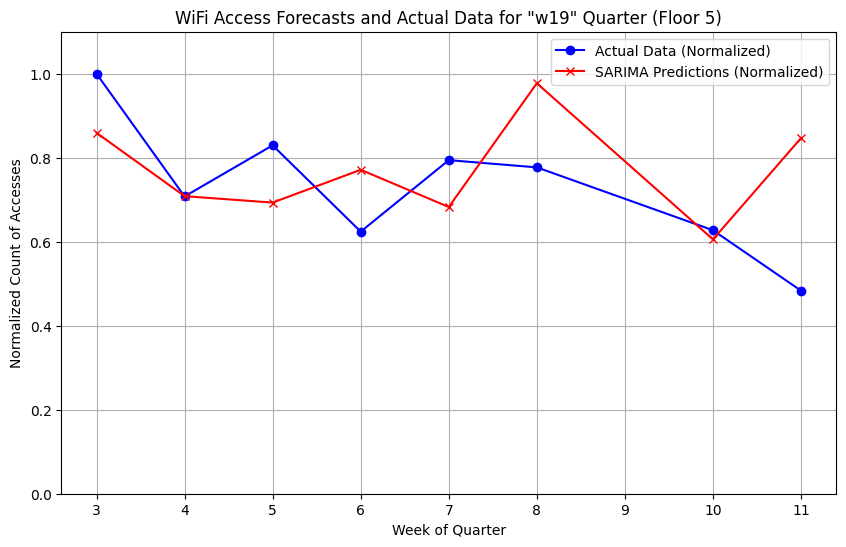

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: w18 || Floor: 6
Mean Absolute Error (MAE): 0.24434475330581673
Mean Absolute Error (MAE) as percentage of mean: 31.37%
31.367737618654594


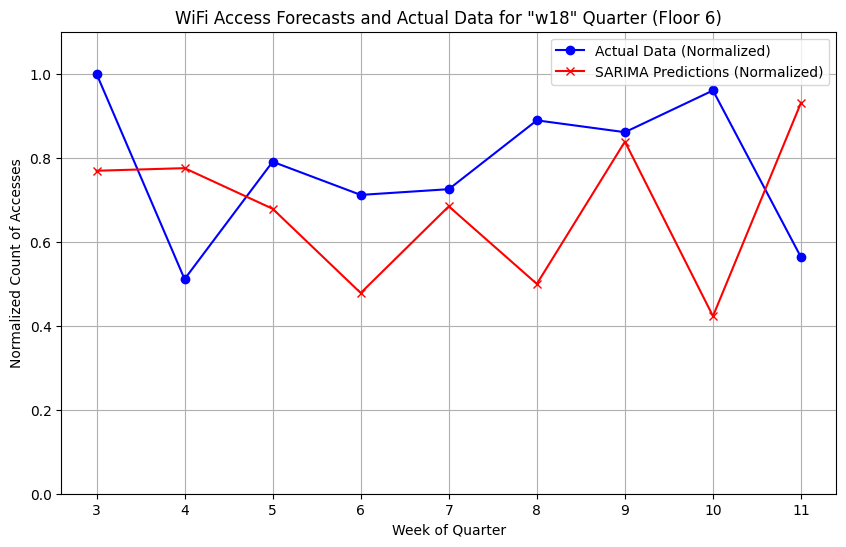

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: s18 || Floor: 6
Mean Absolute Error (MAE): 0.1937115006612834
Mean Absolute Error (MAE) as percentage of mean: 24.91%
24.905518942002


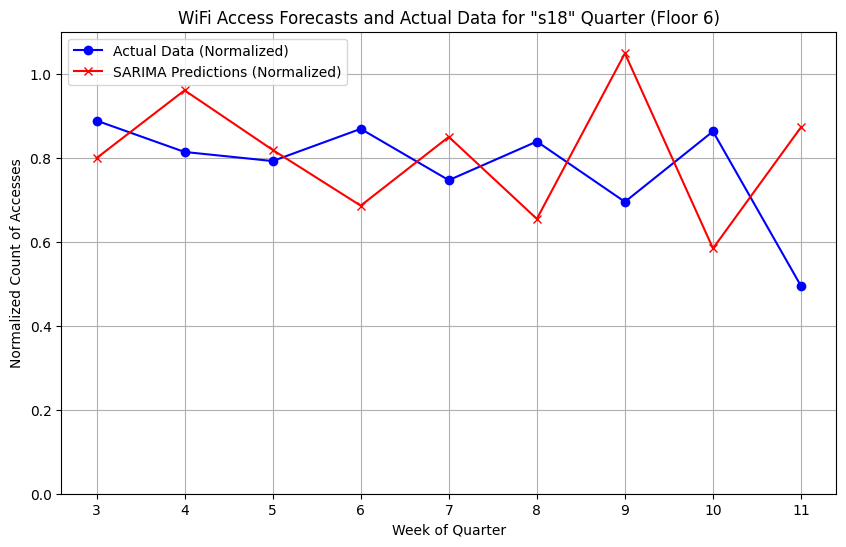

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Quarter: f18 || Floor: 6
Mean Absolute Error (MAE): 0.14106244524861566
Mean Absolute Error (MAE) as percentage of mean: 23.49%
23.487144587264766


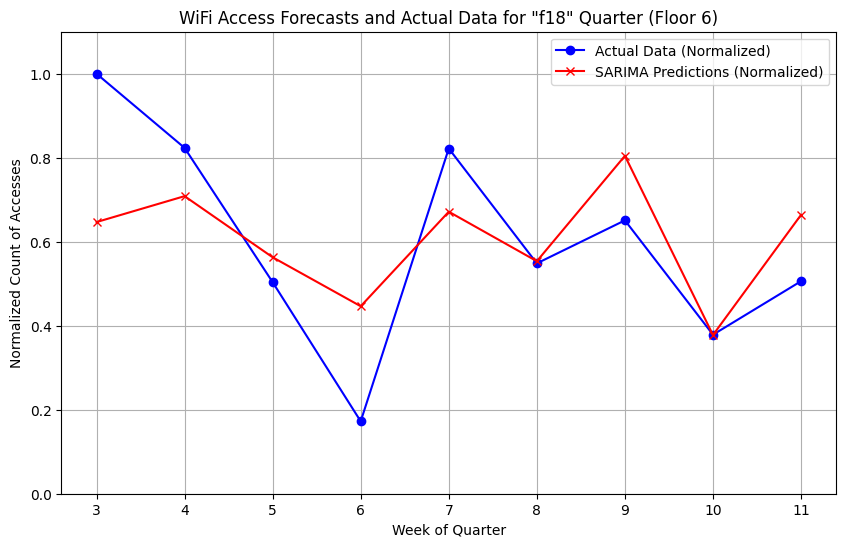

c:\Users\lavin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Quarter: w19 || Floor: 6
Mean Absolute Error (MAE): 0.189332783759873
Mean Absolute Error (MAE) as percentage of mean: 26.74%
26.737912748500882


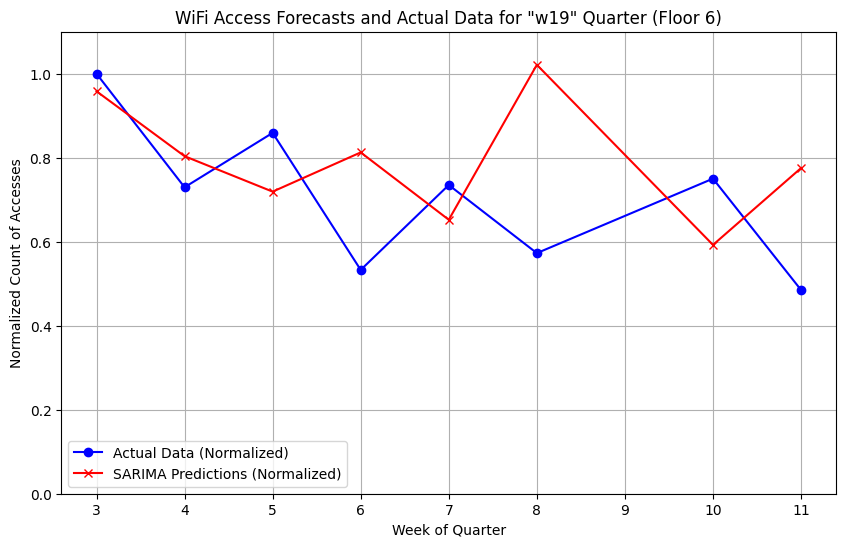

In [37]:
# import warnings

# with warnings.catch_warnings():
#     # Suppress all warnings
#     warnings.filterwarnings("ignore")
    
quarters_no_break = ['w18', 's18', 'f18', 'w19']
all_quarters = ['f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']

mae_percentages = []
for floor in [2, 3, 4, 5, 6]:
    for quarter in quarters_no_break:
        training_quarters = all_quarters.copy()
        training_quarters.remove(quarter) 
        mae_percentage = predict_quarter_processed_4(df_processed_data, quarter, training_quarters, floor)
        mae_percentages.append({'Quarter': quarter, 'Floor': floor, 'MAE Percentage': mae_percentage})

# Convert the list of dictionaries to a DataFrame
mae_df = pd.DataFrame(mae_percentages)

In [38]:
# Print the DataFrame
mae_df

# Calculate the average MAE percentage
mae_avg = mae_df['MAE Percentage'].mean()
# Print the average MAE percentage
print(f'Average Absolute Error (MAE) percentage: {mae_avg:.2f}%')

mean_accuracy = 100 - mae_avg

print(f"Mean Accuracy: {mean_accuracy:.2f}%\n")


# Find the row with the lowest MAE percentage
lowest_mae_row = mae_df.loc[mae_df['MAE Percentage'] == mae_df['MAE Percentage'].min()]

# Find the row with the highest MAE percentage
highest_mae_row = mae_df.loc[mae_df['MAE Percentage'] == mae_df['MAE Percentage'].max()]

# Print the rows in a good format with left alignment
print("Lowest MAE Percentage:")
print(lowest_mae_row.to_string(index=False, justify='left'))

print("\nHighest MAE Percentage:")
print(highest_mae_row.to_string(index=False, justify='left'))


Average Absolute Error (MAE) percentage: 27.67%
Mean Accuracy: 72.33%

Lowest MAE Percentage:
Quarter  Floor  MAE Percentage
w19     2      18.088619      

Highest MAE Percentage:
Quarter  Floor  MAE Percentage
w18     4      44.235979      


# Non-Seasonal Part (order = (p, d, q))

p (autoregressive order) = 1:

Why 1?: Setting p = 1 means the model uses one lag of the dependent variable (the variable you're forecasting) as a predictor. This choice implies that the value at time t depends linearly on the value at time t-1.
Interpretation: For example, if you are predicting the number of WiFi accesses this week, the model will use the number of WiFi accesses last week as a predictor.


- d (differencing order) = 1:

Why 1?: Setting d = 1 means the model differences the data once to make it stationary. Differencing removes trends in the data, making it easier to model.
Interpretation: If the data shows an overall increasing trend, differencing will transform the data to remove this trend, making it stationary around a constant mean.


- q (moving average order) = 1:

Why 1?: Setting q = 1 means the model uses one lag of the forecast error as a predictor. This choice implies that the value at time t depends on the forecast error from time t-1.
Interpretation: If there was a large error in last week's forecast, the model will adjust this week’s forecast to compensate.


# Seasonal Part (seasonal_order = (P, D, Q, s))

- P (seasonal autoregressive order) = 1:

Why 1?: Setting P = 1 means the model includes one seasonal lag of the dependent variable. This choice implies that the value at time t depends on the value from the same season in the previous period.
Interpretation: If you are predicting WiFi accesses in week 5 of a quarter, the model will use the accesses from week 5 of the previous quarter as a predictor.


- D (seasonal differencing order) = 1:

Why 1?: Setting D = 1 means the model differences the data once at the seasonal frequency to remove seasonal trends.
Interpretation: If there is a quarterly seasonal pattern, differencing will remove this pattern, making the data stationary around a constant seasonal mean.


- Q (seasonal moving average order) = 1:

Why 1?: Setting Q = 1 means the model uses one seasonal lag of the forecast error as a predictor.
Interpretation: If there was a large forecast error in the same season of the last period, the model will adjust the current forecast to compensate.


- s (seasonal period) = 12:

Why 12?: Setting s = 12 means the seasonal period is 12. This choice implies that the data has a seasonal pattern repeating every 12 units (e.g., months in a year).
Interpretation: If you are working with weekly data and there is an annual seasonal pattern, s = 52 would be appropriate. However, if your data exhibits a monthly pattern within quarters, s = 12 might be chosen to capture this intra-quarterly seasonality.

# Summary
p = 1: Uses one lag of the dependent variable to account for immediate past values.
d = 1: Differences the data once to remove trends and achieve stationarity.
q = 1: Uses one lag of the forecast error to adjust the model based on past forecast inaccuracies.
P = 1: Uses one seasonal lag of the dependent variable to capture seasonal effects.
D = 1: Differences the data once at the seasonal frequency to remove seasonal trends.
Q = 1: Uses one seasonal lag of the forecast error to adjust for seasonal forecast inaccuracies.
s = 12: Assumes a seasonal pattern that repeats every 12 periods (e.g., monthly pattern within quarters).

# Notes: 
- d=1 is useful if there is a changing trend, say increasing trend of users that access dbh as years pass. this will help keep the trends consistent for comparison and prediction.

- If the model predicts 1000 accesses for a given week, on average, we can expect the actual number of accesses to be off by approximately 423 accesses (42.30% of 1000). In other words, the model's predictions might deviate from the actual values by around 423 accesses.

- RMSE accounts for outliers more heavily than MAE as an error metric, which means MAE could be more applicable to our user count per week.